In [ ]:
#Heart Data Set = 5209 rows

In [1]:
#Import all modules from the SWAT package.
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
#Establsih REST Connection to SAS Viya Environment from Jupyter
#S is used to represent the Session
s = swat.CAS('','','','', protocol='http')

In [3]:
#The s.upload_file() method uploads a data file as-is to CAS and invokes the table.loadtable action in the background to parse it.
heart = s.CASTable("heart", replace=True)
s.upload_file('https://raw.githubusercontent.com/nielsgroenning/pythonbeginners/master/HEART.csv',casout=heart)

NOTE: Cloud Analytic Services made the uploaded file available as table HEART in caslib CASUSER(sdkngr).
NOTE: The table HEART has been created in caslib CASUSER(sdkngr) from binary data uploaded to Cloud Analytic Services.


CASTable('HEART', caslib='CASUSER(sdkngr)')

In [4]:
heart.head(10)

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status
0,Dead,Other,NaN,Female,29.0,62.50,140.0,78.0,124.0,121.0,0.0,55.0,NaN,,Normal,Overweight,Non-smoker
1,Dead,Cancer,NaN,Female,41.0,59.75,194.0,92.0,144.0,183.0,0.0,57.0,181.0,Desirable,High,Overweight,Non-smoker
2,Alive,,NaN,Female,57.0,62.25,132.0,90.0,170.0,114.0,10.0,NaN,250.0,High,High,Overweight,Moderate (6-15)
3,Alive,,NaN,Female,39.0,65.75,158.0,80.0,128.0,123.0,0.0,NaN,242.0,High,Normal,Overweight,Non-smoker
4,Alive,,NaN,Male,42.0,66.00,156.0,76.0,110.0,116.0,20.0,NaN,281.0,High,Optimal,Overweight,Heavy (16-25)
5,Alive,,NaN,Female,58.0,61.75,131.0,92.0,176.0,117.0,0.0,NaN,196.0,Desirable,High,Overweight,Non-smoker
6,Alive,,NaN,Female,36.0,64.75,136.0,80.0,112.0,110.0,15.0,NaN,196.0,Desirable,Normal,Overweight,Moderate (6-15)
7,Dead,Other,NaN,Male,53.0,65.50,130.0,80.0,114.0,99.0,0.0,77.0,276.0,High,Normal,Normal,Non-smoker
8,Alive,,NaN,Male,35.0,71.00,194.0,68.0,132.0,124.0,0.0,NaN,211.0,Borderline,Normal,Overweight,Non-smoker
9,Dead,Cerebral Vascular Disease,NaN,Male,52.0,62.50,129.0,78.0,124.0,106.0,5.0,82.0,284.0,High,Normal,Normal,Light (1-5)


In [ ]:
#CAS actions for simple statistics. 
s.actionsetinfo().setinfo.actionset

In [5]:
#Load the "simple" CAS actionset to do simple statistics
s.loadactionset('simple')

NOTE: Added action set 'simple'.


[actionset]

 'simple'

+ Elapsed: 0.000495s, user: 0.000228s, sys: 0.000235s, mem: 0.194mb

In [6]:
#Summary Statistics
heart.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,AgeCHDdiag,32.0,90.0,1449.0,3760.0,63.302968,91726.0,10.018215,0.263182,100.364639,5.951856e+06,1.453280e+05,15.825823,240.529251,0.0,-0.009968,-0.106100
1,AgeAtStart,28.0,62.0,5209.0,0.0,44.068727,229554.0,8.574954,0.118810,73.529838,1.049910e+07,3.829434e+05,19.458139,370.916268,0.0,0.194759,-1.101644
2,Height,51.5,76.5,5203.0,6.0,64.813185,337223.0,3.582707,0.049669,12.835792,2.192327e+07,6.677179e+04,5.527745,1304.905127,0.0,0.177420,-0.396057
3,Weight,67.0,300.0,5203.0,6.0,153.086681,796510.0,28.915426,0.400869,836.101866,1.262845e+08,4.349402e+06,18.888270,381.886867,0.0,0.555941,0.522756
4,Diastolic,50.0,160.0,5209.0,0.0,85.358610,444633.0,12.973091,0.179749,168.301098,3.882977e+07,8.765121e+05,15.198339,474.876895,0.0,0.875944,1.854242
5,Systolic,82.0,300.0,5209.0,0.0,136.909580,713162.0,23.739596,0.328924,563.568435,1.005738e+08,2.935064e+06,17.339617,416.234127,0.0,1.487577,4.228371
6,MRW,67.0,268.0,5203.0,6.0,119.957525,624139.0,19.983401,0.277040,399.336335,7.694752e+07,2.077348e+06,16.658731,432.997106,0.0,1.132376,3.342027
7,Smoking,0.0,60.0,5173.0,36.0,9.366518,48453.0,12.031451,0.167281,144.755816,1.202513e+06,7.486771e+05,128.451689,55.992701,0.0,1.222404,0.986614
8,AgeAtDeath,36.0,93.0,1991.0,3218.0,70.536414,140438.0,10.559406,0.236649,111.501060,1.012788e+07,2.218871e+05,14.970149,298.063988,0.0,-0.316054,-0.365255
9,Cholesterol,96.0,568.0,5057.0,152.0,227.417441,1150050.0,44.935524,0.631893,2019.201302,2.717505e+08,1.020908e+07,19.759049,359.898832,0.0,0.816344,2.103768


In [ ]:
#Pearson Correlation Coefficients
heart.correlation(simple=False)

In [ ]:
#Load CAS Actionset regression
s.loadactionset('regression')

In [ ]:
heart.glm(target='Height', inputs=['Cholesterol'])

In [ ]:
#Load CAS Actionset Decision Tree
s.loadactionset('decisiontree')

In [ ]:
forest1 = heart.Foresttrain()

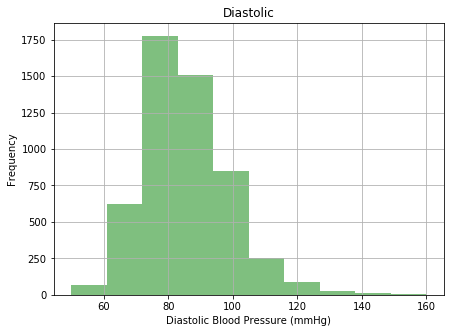

In [7]:
heart.hist(column="Diastolic", alpha=0.5, color="green", label=None)
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.gcf().set_size_inches((7, 5)) 

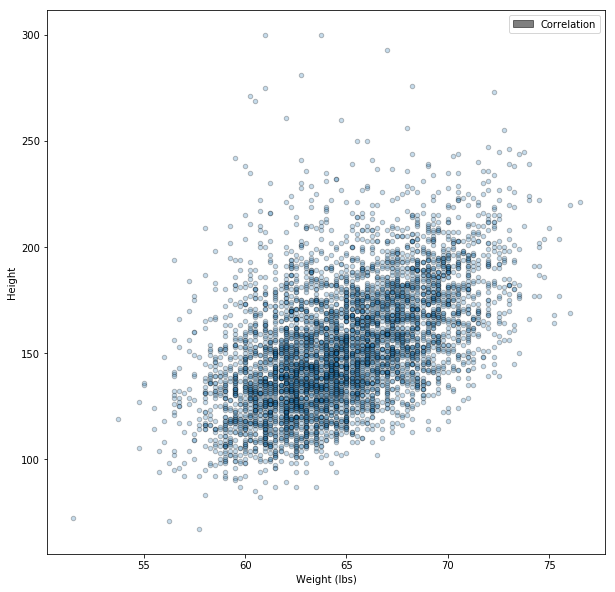

In [9]:
#This method fetches the data from the CAS table and uses the pandas.DataFrame.plot.scatter() method to plot it. 
heart.plot.scatter('Height', 'Weight', alpha=0.25, s=None, c=None, edgecolor='black')
black_patch = mpatches.Patch(color='black', alpha=0.5, label='Correlation')
plt.legend(handles=[black_patch])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height")
plt.gcf().set_size_inches((10, 10)) 

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

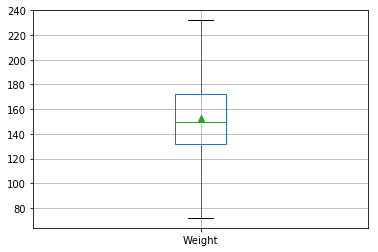

In [13]:
#This method fetches the data from the CAS table and calls the pandas.DataFrame.boxplot() method to do the rendering.
green_diamond = dict(markerfacecolor='r', marker='D', alpha=0.5)
heart.boxplot(column="Weight", showmeans="Weight", showfliers=False, flierprops=green_diamond)
plt.label("Weight (lbs)")

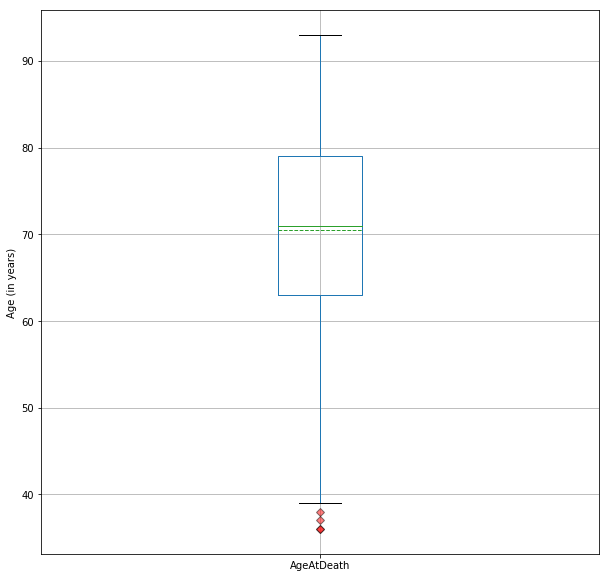

In [12]:
green_diamond = dict(markerfacecolor='r', marker='D', alpha=0.5)
heart.boxplot(column="AgeAtDeath", showmeans="AgeAtDeath", showfliers=True, flierprops=green_diamond, meanline=True)
plt.ylabel("Age (in years)")
plt.gcf().set_size_inches((10, 10)) 

In [ ]:
s.help(history)

In [ ]:
s.conn(close)